In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bs_df = pd.read_csv("/content/drive/MyDrive/EC439/bs_df.csv")

In [ ]:
bs_df.head()

,Period End Date,Total Current Liabilities,Minority Interest,Minority Interest - Non Redeemable,Total Current Assets less Inventory,"Accounts Receivable - Trade, Gross",Common Stock,Total Common Shares Outstanding,Receivables - Other,Defered Income Tax - Long Term Asset,...,"Tangible Book Value, Common Equity",Long Term Investments,Treas Shares - Common Stock Prmry Issue,Cash and Short Term Investments,"Other Current liabilities, Total",Additional Paid-In Capital,"Common Stock, Total",Retained Earnings (Accumulated Deficit),Company name,Fraud
0,31-Dec-2004,821500.0,-179534.0,-179534.0,447718.0,425090.0,508174.0,1002140.0,4409.0,0.0,...,213202.0,0.0,0.0,33950.0,190948.0,107500.0,508174.0,-167701.0,AKR,0
1,30-Jun-2005,626215.0,0.0,0.0,492350.0,418756.0,608174.0,1002140.0,14823.0,0.0,...,513794.0,0.0,0.0,38295.0,60269.0,207500.0,608174.0,-96783.0,AKR,0
2,31-Dec-2005,703892.0,0.0,0.0,410495.0,326237.0,608174.0,1002140.0,21000.0,0.0,...,620668.0,0.0,0.0,45014.0,77238.0,4924.0,608174.0,7570.0,AKR,0
3,31-Mar-2006,785650.0,0.0,0.0,417965.0,291767.0,608174.0,1002140.0,11848.0,0.0,...,624519.0,0.0,0.0,87349.0,102648.0,4924.0,608174.0,11421.0,AKR,0
4,30-Jun-2006,764503.0,0.0,0.0,476753.0,389935.0,608174.0,1002140.0,12731.0,0.0,...,669173.0,0.0,0.0,46049.0,98828.0,4924.0,608174.0,56075.0,AKR,0


In [ ]:
# Separate features (X) and target (Y)
X_bs = bs_df.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_bs = bs_df['Fraud']  # Only the 'Fraud' column

<ipython-input-16-573338c3e683>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-16-573338c3e683>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-16-573338c3e683>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-16-573338c3e683>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-16-573338c3e683>:14: UserWarning: set_ticklabels() should onl

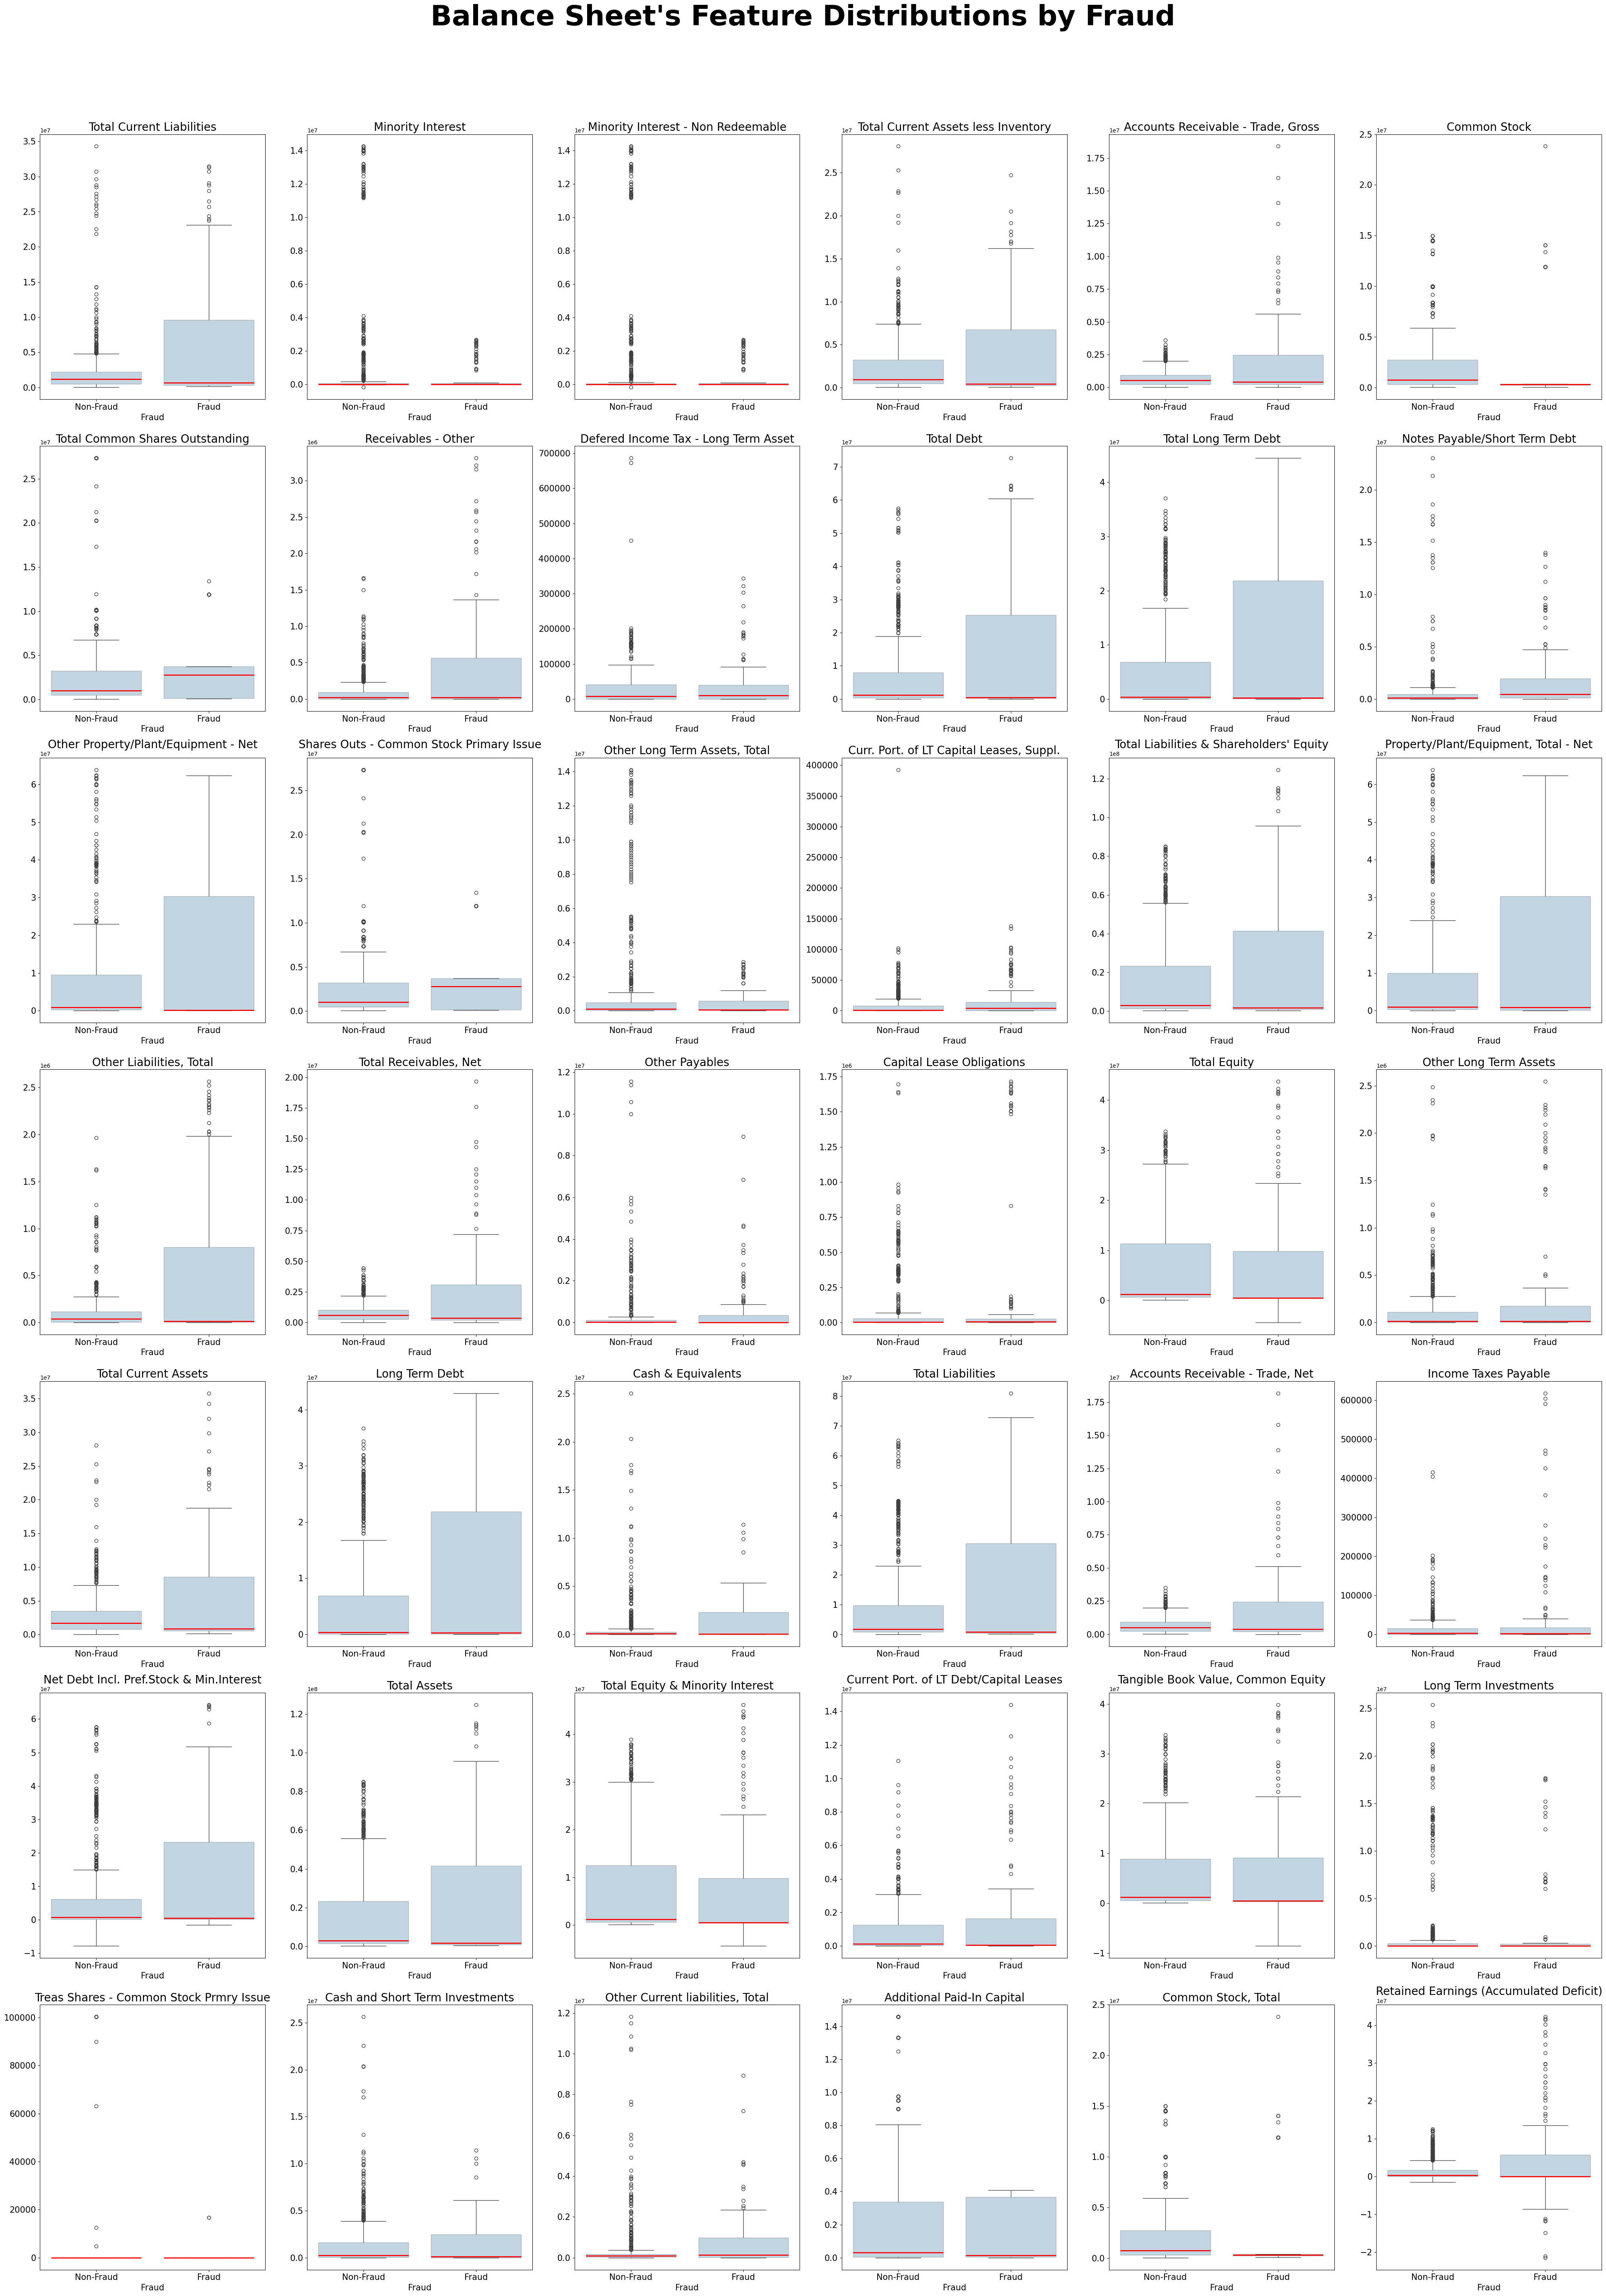

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def BoxPlot(data, col, hue, ax):
    sns.boxplot(x=hue, y=col, data=data, ax=ax,
                boxprops=dict(alpha=0.3, linewidth=1),
                medianprops=dict(color="red", linewidth=2))
    ax.set_title(col, fontsize=20)
    ax.set_xlabel("Fraud", fontsize=15)
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1

bs_cols = X_bs.columns

# Calculate grid dimensions for 42 plots
n_cols = 6  # Number of columns in the grid
n_rows = math.ceil(len(bs_cols) / n_cols)  # Calculate number of rows

# Create subplots with adjusted grid size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 60))  # Adjust figsize
fig.suptitle("Balance Sheet's Feature Distributions by Fraud", fontsize=50, weight='bold')

# Loop to create box plots for all 42 features
for i, col in enumerate(bs_cols):
    row = i // n_cols
    col_num = i % n_cols
    BoxPlot(pd.concat([X_bs, Y_bs], axis=1), col, hue="Fraud", ax=axes[row, col_num])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('balance_sheet_feature_distributions_boxplot_all.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in bs_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize bs_df
bs_df_normalized = normalize_by_group(bs_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
bs_df_normalized.head()

,Period End Date,Total Current Liabilities,Minority Interest,Minority Interest - Non Redeemable,Total Current Assets less Inventory,"Accounts Receivable - Trade, Gross",Common Stock,Total Common Shares Outstanding,Receivables - Other,Defered Income Tax - Long Term Asset,...,"Tangible Book Value, Common Equity",Long Term Investments,Treas Shares - Common Stock Prmry Issue,Cash and Short Term Investments,"Other Current liabilities, Total",Additional Paid-In Capital,"Common Stock, Total",Retained Earnings (Accumulated Deficit),Company name,Fraud
0,31-Dec-2004,0.332084,0.00000,0.00000,0.388249,0.648119,0.0000,0.000017,0.047198,0.0,...,0.000000,0.0,0.0,0.071515,0.665984,0.362463,0.0000,0.567570,AKR,0
1,30-Jun-2005,0.217698,0.99189,0.99189,0.473400,0.631017,0.1494,0.000017,0.158681,0.0,...,0.231679,0.0,0.0,0.088396,0.113990,0.699638,0.1494,0.629203,AKR,0
2,31-Dec-2005,0.263196,0.99189,0.99189,0.317233,0.381211,0.1494,0.000017,0.224806,0.0,...,0.314051,0.0,0.0,0.114501,0.185668,0.016602,0.1494,0.719894,AKR,0
3,31-Mar-2006,0.311085,0.99189,0.99189,0.331485,0.288141,0.1494,0.000017,0.126833,0.0,...,0.317020,0.0,0.0,0.278982,0.293001,0.016602,0.1494,0.723241,AKR,0
4,30-Jun-2006,0.298699,0.99189,0.99189,0.443643,0.553199,0.1494,0.000017,0.136286,0.0,...,0.351436,0.0,0.0,0.118522,0.276865,0.016602,0.1494,0.762049,AKR,0


In [ ]:
# Separate features (X) and target (Y)
X_bs = bs_df_normalized.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_bs = bs_df_normalized['Fraud']  # Only the 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_bs.shape)
print("Shape of Y:", Y_bs.shape)

Shape of X: (851, 42)
Shape of Y: (851,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Typically, 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_bs, Y_bs, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (680, 42)
Shape of X_test: (171, 42)
Shape of Y_train: (680,)
Shape of Y_test: (171,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9415
Precision: 0.9333
Recall: 0.6087
F1 Score: 0.7368

Random Forest Performance:
Accuracy: 0.9766
Precision: 1.0000
Recall: 0.8261
F1 Score: 0.9048


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8822222222222221


In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                     Feature  Coefficient  \
41   Retained Earnings (Accumulated Deficit)     4.230274   
25                            Long Term Debt     2.443665   
31                              Total Assets    -1.825208   
16  Total Liabilities & Shareholders' Equity    -1.825207   
17     Property/Plant/Equipment, Total - Net     1.753071   
4         Accounts Receivable - Trade, Gross    -1.609569   
28          Accounts Receivable - Trade, Net    -1.607634   
22                              Total Equity    -1.586740   
32          Total Equity & Minority Interest    -1.478140   
24                      Total Current Assets    -1.363853   

    Absolute_Coefficient  
41              4.230274  
25              2.443665  
31              1.825208  
16              1.825207  
17              1.753071  
4               1.609569  
28              1.607634  
22              1.586740  
32              1.478140  
24              1.363853  


In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                     Feature  Importance
30  Net Debt Incl. Pref.Stock & Min.Interest    0.103906
41   Retained Earnings (Accumulated Deficit)    0.068103
40                       Common Stock, Total    0.048965
5                               Common Stock    0.041382
1                          Minority Interest    0.040128
19                    Total Receivables, Net    0.037651
34        Tangible Book Value, Common Equity    0.035106
24                      Total Current Assets    0.034005
2         Minority Interest - Non Redeemable    0.031215
22                              Total Equity    0.029649
